<a href="https://colab.research.google.com/github/sf927/info371/blob/main/INFO371_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drexel University
## College of Computing and Informatics
## INFO 371: Data Mining Applications
## Assignment 1

## Due Date: Sunday, Jan. 26, 2025
### This assignment counts for 15% of the final grade


## **DON'T FORGET TO PUT YOUR NAME BELOW**

## **NAME:**


### A. What to Hand In

1. A completed this Jupyter notebook.
2. Any data sets used in the assignment.
3. Any multimedia and images used in the assignment.

### B. How to Hand In

Submit your files through the course website in the Blackboard Learn system.

### C. When to Hand In

1. Submit your assignment no later than 11:59pm in the due date.
2. There will be a 10% (absolute value) deduction for each day of lateness, to a maximum of 3 days; assignments will not be accepted beyond that point. Missing work will earn a zero grade.

### D. Answer the following questions

## Question 1 [20 marks]:
Download the CSV file `stackoverflow_survey_results.csv` which contains the survey results of StackOverflow developers in 2017. Save the file to your drive.
1. Load the CSV as a Pandas DataFrame named as `stackoverflow_surveys`.
2. How many rows and columns in the DataFrame?
3. Use code to list the column names of the DataFrame.
4. Explore the data to understand the column meaning and relevance using a tool, for example, Excel. Complete the following steps to formulate a prediction problem:  
 - Select a target column (dependent variable) to predict based on your exploration.
 - Explain why you chose this column as target.
 - Identify the columns you will use as predictors (independent variables).
 - Define the Prediction Objective.
 - Discuss any potential challenges, such as missing data, imbalanced classes, or the need for feature engineering.


In [43]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
file = "/content/stackoverflow_survey_results.csv"

In [51]:
stackoverflow_survey_results = pd.read_csv(file)

In [70]:
stackoverflow_survey_results.shape




(51392, 154)

In [57]:
# List all column names
print(stackoverflow_survey_results.columns.tolist())


['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University', 'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote', 'CompanySize', 'CompanyType', 'YearsProgram', 'YearsCodedJob', 'YearsCodedJobPast', 'DeveloperType', 'WebDeveloperType', 'MobileDeveloperType', 'NonDeveloperType', 'CareerSatisfaction', 'JobSatisfaction', 'ExCoderReturn', 'ExCoderNotForMe', 'ExCoderBalance', 'ExCoder10Years', 'ExCoderBelonged', 'ExCoderSkills', 'ExCoderWillNotCode', 'ExCoderActive', 'PronounceGIF', 'ProblemSolving', 'BuildingThings', 'LearningNewTech', 'BoringDetails', 'JobSecurity', 'DiversityImportant', 'AnnoyingUI', 'FriendsDevelopers', 'RightWrongWay', 'UnderstandComputers', 'SeriousWork', 'InvestTimeTools', 'WorkPayCare', 'KinshipDevelopers', 'ChallengeMyself', 'CompetePeers', 'ChangeWorld', 'JobSeekingStatus', 'HoursPerWeek', 'LastNewJob', 'AssessJobIndustry', 'AssessJobRole', 'AssessJobExp', 'AssessJobDept', 'AssessJobTech', 'AssessJobProjects', 'AssessJobCompensation', '

## Question 2 [20 marks]:
1. Prepare a small data set in CSV format. While you can create any data of your own interest, here are some requirements on what you should have in the data:
 * The data should have three (and only three) attributes: two numeric (numbers) attributes and one nominal (categorical) with 2 different values (2 classes);
 * The data set should have at least 40 instances.
2. Save the data as a CSV file and Load the data as a Pandas DataFrame.
3. Show the descriptive statistics of the data.
4. Use matplotlib to visualize your data: x-axis and y-axis corresponding to the two numeric attribues; coloring the points with the nominal attribute.


In [58]:
# prompt: Prepare a small data set in CSV format. While you can create any data of your own interest, here are some requirements on what you should have in the data:
# The data should have three (and only three) attributes: two numeric (numbers) attributes and one nominal (categorical) with 2 different values (2 classes);
# The data set should have at least 40 instances.
# Save the data as a CSV file and Load the data as a Pandas DataFrame.
# Show the descriptive statistics of the data.
# Use matplotlib to visualize your data: x-axis and y-axis corresponding to the two numeric attribues; coloring the points with the nominal attribute.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [59]:
# Create a sample dataset
np.random.seed(42)  # for reproducibility
num_instances = 50
data = {
    'numeric1': np.random.rand(num_instances) * 10,
    'numeric2': np.random.rand(num_instances) * 10,
    'nominal': np.random.choice(['A', 'B'], size=num_instances)
}
df = pd.DataFrame(data)

In [60]:
# Save the data to a CSV file
df.to_csv('/content/sample_data.csv', index=False)

In [61]:
# Load the data from the CSV file
df = pd.read_csv('/content/sample_data.csv')

In [62]:
# Descriptive statistics
print(df.describe())

        numeric1   numeric2
count  50.000000  50.000000
mean    4.459239   4.944376
std     2.888832   3.068415
min     0.205845   0.055221
25%     1.837670   2.168740
50%     4.360488   5.082642
75%     6.498549   7.711946
max     9.699099   9.868869


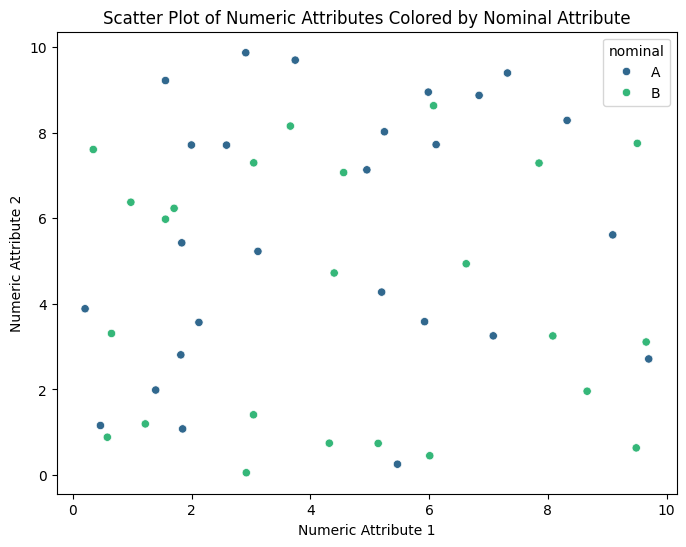

In [63]:
# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x='numeric1', y='numeric2', hue='nominal', data=df, palette='viridis')
plt.title('Scatter Plot of Numeric Attributes Colored by Nominal Attribute')
plt.xlabel('Numeric Attribute 1')
plt.ylabel('Numeric Attribute 2')
plt.show()

## Question 3 [60 marks] Use the data set you created in Question 2:
1. Import KNeighborsClassifier from Scikit-Learn
2. Import accuracy_score from Scikit-Learn
3. Extract the two numerical attributes as training data X and the categorical attribute as target y
4. Fit a K Nearest Neighbor classifier on X and y
5. Predict the target labels of the training data X
6. Compute and show the accurcy score of the KNN classifier on the training data X
7. By default, how many nearest neighbors are used in the model?
8. Use different number of nearest neighbors; test K = 1, 2, 3 and show the accuracy results.
9. Does the value of K affect the performance? Why or Why not?

In [64]:
# prompt: Import KNeighborsClassifier from Scikit-Learn
# Import accuracy_score from Scikit-Learn
# Extract the two numerical attributes as training data X and the categorical attribute as target y
# Fit a K Nearest Neighbor classifier on X and y
# Predict the target labels of the training data X
# Compute and show the accurcy score of the KNN classifier on the training data X
# By default, how many nearest neighbors are used in the model?
# Use different number of nearest neighbors; test K = 1, 2, 3 and show the accuracy results.
# Does the value of K affect the performance? Why or Why not?

# Extract features (X) and target (y)
X = df[['numeric1', 'numeric2']]
y = df['nominal']


In [65]:
# Initialize and train the KNN classifier
knn = KNeighborsClassifier()  # Default n_neighbors = 5
knn.fit(X, y)

KNeighborsClassifier()

In [66]:
# Make predictions on the training data
y_pred = knn.predict(X)

In [67]:
# Calculate the accuracy score
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy with default k (5): {accuracy}")

Accuracy with default k (5): 0.68


In [68]:
# By default, k=5
print("Default number of neighbors:", knn.n_neighbors)

Default number of neighbors: 5


In [69]:
# Test with different k values
k_values = [1, 2, 3]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    accuracy = accuracy_score(y, y_pred)
    print(f"Accuracy with k={k}: {accuracy}")

Accuracy with k=1: 1.0
Accuracy with k=2: 0.68
Accuracy with k=3: 0.78


# Does the value of K affect the performance?
# Yes, the value of K can affect the performance.  A small value of K (e.g., 1) can lead to overfitting, where the model learns the training data too well but may not generalize well to unseen data.  A large value of K can lead to underfitting, where the model is too smooth and may not capture the complexity of the data.  The optimal value of K depends on the specific dataset and problem.